In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from assistants.ai_assistant import AiAssistant
from users.user import User

In [ ]:
def run():
    
    seed = 123

    goal = 3

    step_size = 0.01

    learning_rate = 0.01

    max_n_step = 200

    n_targets = 5
    debug = False

    beta = 3.0
    
    # ------ #

    
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    trace = {k: [] for k in ("b", "user_action", "x", "assistant_action")}

    assistant = AiAssistant(
        step_size=step_size, n_targets=n_targets, beta=beta, learning_rate=learning_rate,
        debug=debug)
    user = User(n_targets=n_targets, beta=beta, debug=debug)

    _ = user.reset()
    user.goal = goal
    assistant_output = assistant.reset()

    for step in range(max_n_step):

        trace["x"].append(assistant_output)
        trace["b"].append(assistant.variational_density(assistant.b).numpy())
        
        if debug:
            print("Positions", assistant.x)
    
        user_output, _, user_done, _ = user.step(assistant_output)
        if user_done:
            break
        
        if debug:
            print("User action", user_output)

        assistant_output, _, assistant_done, _ = assistant.step(user_output)
        if assistant_done:
            break

        trace["user_action"].append(user_output)
        trace["assistant_action"].append(assistant.a.item())
        
        if debug:
            print()

    # trace["x"].append(assistant_output)
    # trace["b"].append(assistant.variational_density(b).numpy())

    # print(trace["b"])
    return trace

In [ ]:
trace = run()

In [ ]:
def plot_traces(trace):
    
    b_trace = trace["b"]
    user_action_trace = np.asarray(trace["user_action"])
    assistant_action_trace = np.asarray(trace["assistant_action"])
    
    n_epochs = len(b_trace)
    
    fig = plt.figure(figsize=(15, 4))
    ax = fig.gca()
    im = ax.imshow(
        np.transpose(b_trace),
        interpolation="nearest", 
        aspect = "auto", 
        vmin = 0, vmax = 1, 
        cmap = "viridis")
    c = np.asarray(['red' if a==1 else 'green' for a in user_action_trace])
    # psi = np.asarray(psi_trace)
    epochs = np.arange(n_epochs)
    # a_trace.append(0)
    a = np.asarray(user_action_trace)
    idx = a == 0
    ax.scatter(epochs[idx], assistant_action_trace[idx], c=c[idx], marker = 'v')
    idx = a == 1
    ax.scatter(epochs[idx], assistant_action_trace[idx], c=c[idx], marker = '^')
    # idx = a==0
    # ax.scatter(epochs[idx], psi[idx], c = c[idx], marker = 'o')    
    ax.invert_yaxis()
    ax.set_xlim([0,n_epochs])
    fig.colorbar(im)
    # return fig

In [ ]:
plot_traces(trace)

In [ ]:
plt.plot(np.asarray(trace["x"]))

In [ ]:
np.asarray(trace["x"])

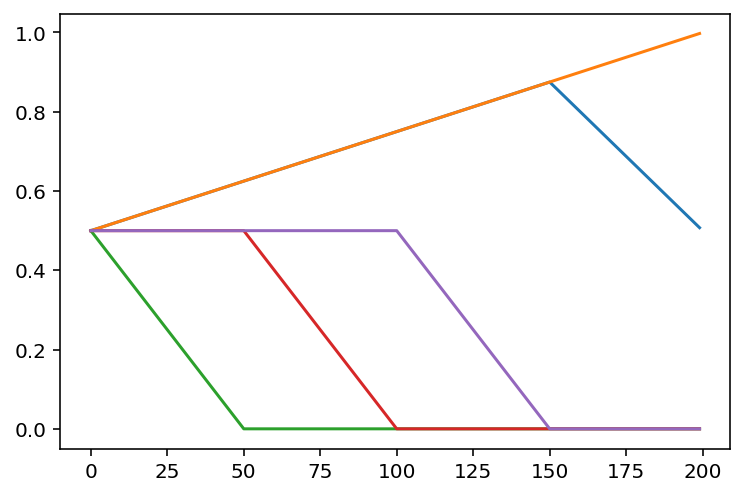

In [13]:
plt.plot(np.asarray(trace["x"]))

In [12]:
np.asarray(trace["x"])

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.02499998e-01, 5.02499998e-01, 4.90000010e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.04999995e-01, 5.04999995e-01, 4.80000019e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.07499993e-01, 5.07499993e-01, 4.70000029e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.09999990e-01, 5.09999990e-01, 4.60000038e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.12499988e-01, 5.12499988e-01, 4.50000048e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.14999986e-01, 5.14999986e-01, 4.40000057e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.17499983e-01, 5.17499983e-01, 4.30000067e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.19999981e-01, 5.19999981e-01, 4.20000076e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.22499979e-01, 5.22499979e-01, 4.10000086e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.24999976e-01, 5.2499